In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from models import KNN, NearestCentroid

# Chargement des données
df = pd.read_csv("./QSAR_10best_dataset.csv")
features = list(set(df.columns) - {"Class"})
df.head(5)
# Conversion des données en format numpy
X = df.loc[:, df.columns != "Class"].to_numpy()
y_true = df.loc[:, "Class"].to_numpy()
# Conversion des étiquettes en valeurs numériques pour faciliter leur traitement par numpy
le = LabelEncoder()
le.fit(y_true)
# Validation du chargement des données
print(df.shape)
df.head(5)

(202, 11)


,chi1,a_nC,CASA+,chi0,chi1_C,vsa_pol,mr,rgyr,SlogP,a_hyd,Class
0,4.721116,1.171659,0.021174,4.798125,-0.872065,1.515832,-0.422487,3.259257,0.405770,4.737850,Class 2
1,-1.762903,-0.653133,-0.113931,-1.545517,0.293187,-0.548002,-1.541814,-2.173004,-1.339127,-1.465842,Class 2
2,0.805566,0.259263,-0.746696,0.647364,-0.146473,-0.548002,1.317803,0.450247,1.673240,1.015635,Class -2
3,0.032304,-0.653133,-0.526454,0.049759,-0.679870,-0.357563,0.304239,-0.639117,-0.407609,-0.225104,Class -2
4,0.591955,0.259263,-0.589794,0.458730,-0.042406,-0.548002,1.120570,0.504929,1.393964,0.808845,Class -2


In [46]:
# Les données devraient déjà être centrées et réduites
assert np.allclose(X.mean(), 0, atol=1e-10), "Les données ne sont pas centrées"
assert np.allclose(X.std(), 1, atol=1e-2), "Les données ne sont pas réduites"

In [47]:
# Séparation en jeu de test et jeu d'entraînement
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.25, random_state=0)

In [48]:
# Classifieur K Nearest Neighbors
n_neighbors = 5
_, counts = np.unique(y_true, return_counts=True)
weights = counts/counts.sum()

knn_clf = KNN(5, le, weights)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
knn_df = knn_clf.evaluate(y_test, y_pred)
knn_df

,Class -1,Class -2,Class 0,Class 1,accuracy,macro avg,weighted avg
precision,0.727273,0.800000,0.615385,0.750000,0.72549,0.723164,0.723852
recall,0.571429,1.000000,0.666667,0.692308,0.72549,0.732601,0.725490
f1-score,0.640000,0.888889,0.640000,0.720000,0.72549,0.722222,0.718954
support,14.000000,12.000000,12.000000,13.000000,0.72549,51.000000,51.000000


In [49]:
# Classifieur NearestCentroid
nc_clf = NearestCentroid(le)
nc_clf.fit(X_train, y_train)
y_pred = nc_clf.predict(X_test)
nc_df = nc_clf.evaluate(y_test, y_pred)
nc_df

C:\Users\verdi\anaconda3\envs\anomaly_detection\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\verdi\anaconda3\envs\anomaly_detection\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\verdi\anaconda3\envs\anomaly_detection\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Class -1,Class -2,Class 0,Class 1,Class 2,accuracy,macro avg,weighted avg
precision,0.416667,0.631579,0.500000,0.733333,0.0,0.588235,0.456316,0.567561
recall,0.357143,1.000000,0.166667,0.846154,0.0,0.588235,0.473993,0.588235
f1-score,0.384615,0.774194,0.250000,0.785714,0.0,0.588235,0.438905,0.546848
support,14.000000,12.000000,12.000000,13.000000,0.0,0.588235,51.000000,51.000000


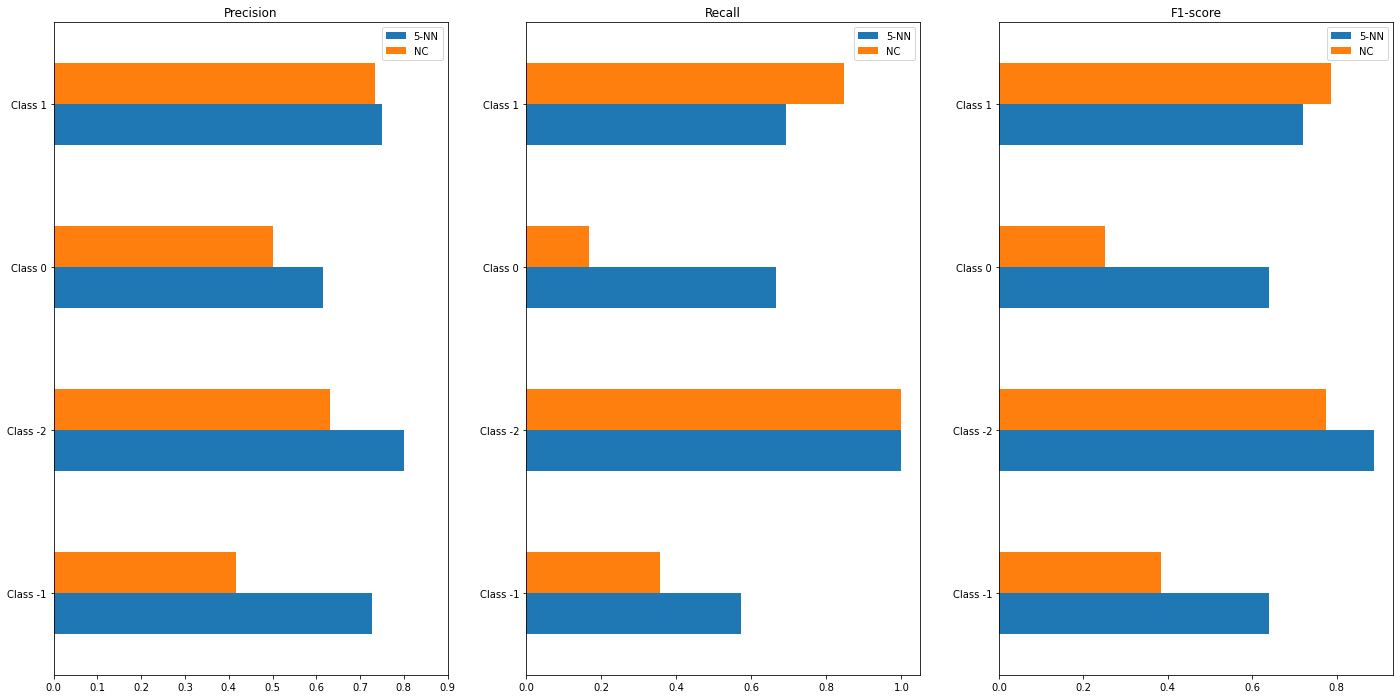

In [50]:

f, axs = plt.subplots(1, 3, figsize=(24, 12))

df_precision = pd.concat([
    knn_df.loc["precision"][0:4].rename("5-NN"), 
    nc_df.loc["precision"][0:4].rename("NC")
], axis=1)
df_recall = pd.concat([
    knn_df.loc["recall"][0:4].rename("5-NN"), 
    nc_df.loc["recall"][0:4].rename("NC")
], axis=1)
df_f1 = pd.concat([
    knn_df.loc["f1-score"][0:4].rename("5-NN"), 
    nc_df.loc["f1-score"][0:4].rename("NC")
], axis=1)

df_precision.plot(kind="barh", ax=axs[0])
df_recall.plot(kind="barh", ax=axs[1])
df_f1.plot(kind="barh", ax=axs[2])

axs[0].set_title("Precision")
axs[0].set_xticks(np.arange(0, 1, step=0.1))
axs[1].set_title("Recall")
axs[2].set_title("F1-score")

plt.show()

Constate supériorité de l'approche KNN par rapport à CN. Meilleur f1-score pour la classe 1 pour CN mais avec seulement 1% de différence.

In [51]:
y_train, y_test = le.transform(y_train), le.transform(y_test)

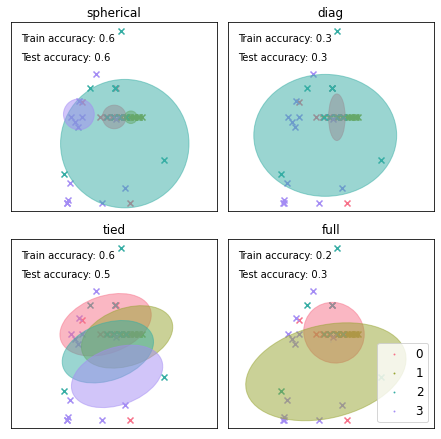

In [52]:
# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# Modified by Aida Ouangraoua <aida.ouangraoua@usherbrooke.com>
# Modified by Nadia Tahiri <Nadia.Tahiri@USherbrooke.com>
# Initial code at https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import seaborn as sns

colors = sns.color_palette("husl", 4)

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

n_classes = 4

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=100, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)

for index, (name, estimator) in enumerate(estimators.items()):

    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    e = np.array([X_train[y_train == i].mean(axis=0) for i in range(n_classes)])
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0) for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = X[y_true == n]
        plt.scatter(data[:, 0], data[:, 1], s = 0.8, color=color, label=n)
        
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred==y_train)
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred==y_test)
    
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))

plt.show()

Selon résultats obtenus, paramètre par défaut ("spherical") produit les meilleurs résultats.

In [53]:
from sklearn import metrics

gmm_clf = GaussianMixture(n_components=n_classes, covariance_type="spherical", max_iter=100)
gmm_clf.means_init = np.array([X_train[y_train == i].mean(axis=0) for i in range(n_classes)])
gmm_clf.fit(X_train, y_train)
y_pred = gmm_clf.predict(X_test)
d = metrics.classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred), output_dict=True)
pd.DataFrame.from_dict(d)

,Class -1,Class -2,Class 0,Class 1,accuracy,macro avg,weighted avg
precision,0.550000,1.000000,0.125000,0.500000,0.568627,0.543750,0.543137
recall,0.785714,0.916667,0.083333,0.461538,0.568627,0.561813,0.568627
f1-score,0.647059,0.956522,0.100000,0.480000,0.568627,0.545895,0.548570
support,14.000000,12.000000,12.000000,13.000000,0.568627,51.000000,51.000000


In [54]:
best_clf = knn_clf

In [55]:
df_test = pd.read_excel("test_TP1.xlsx")
X_test = df_test.loc[:, features]
best_clf.predict(X_test)


array(['Class 0', 'Class 0'], dtype=object)